TASK 1

In [1]:
import os

import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from autorank import autorank, create_report, plot_stats
import pandas as pd
from pandas.api.types import CategoricalDtype
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
RANDOM_STATE = 1345
np.random.seed(RANDOM_STATE)

In [4]:
PATH_data_A2 = os.path.join('data', 'data_A2.csv')
print(PATH_data_A2)
PATH_labels_A2 = os.path.join('data', 'labels_A2.csv')
print(PATH_labels_A2)


data\data_A2.csv
data\labels_A2.csv


In [5]:

data= pd.read_csv(PATH_data_A2,header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.919015,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398
1,0.267386,NaN,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,1.394421,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773
2,2.946515,-1.594067,NaN,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.290845,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401
3,-4.581082,-0.001274,1.197022,NaN,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,1.046033,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303
4,-2.123360,-0.266587,1.781999,-0.039342,NaN,0.895856,3.756880,-4.583167,1.652762,7.673453,...,1.371734,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535


In [6]:
COLUMN_NAME = ['Class']
labels = pd.read_csv(PATH_labels_A2,names=COLUMN_NAME,header=None)
labels.head()


,Class
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [7]:
newdata= pd.concat([data,labels],axis=1)
newdata.head()



,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,NaN,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398,1.0
1,0.267386,NaN,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773,0.0
2,2.946515,-1.594067,NaN,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401,0.0
3,-4.581082,-0.001274,1.197022,NaN,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303,0.0
4,-2.123360,-0.266587,1.781999,-0.039342,NaN,0.895856,3.756880,-4.583167,1.652762,7.673453,...,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535,1.0


In [8]:
print(newdata.isnull().values.any())

True


In [9]:
print(newdata.isnull().sum().sum())

1000


In [10]:
for x in range(100):
  mean = newdata[x].mean()
  newdata[x].fillna(mean, inplace=True)
else:
  print("Finally finished!")
print(newdata.isnull().values.any())


Finally finished!
False


In [11]:
newdata.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Class
0,-0.036409,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398,1.0
1,0.267386,0.010517,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773,0.0
2,2.946515,-1.594067,0.539400,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401,0.0
3,-4.581082,-0.001274,1.197022,0.242458,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303,0.0
4,-2.123360,-0.266587,1.781999,-0.039342,-0.075077,0.895856,3.756880,-4.583167,1.652762,7.673453,...,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535,1.0


In [12]:
newdata.to_csv('outputnewdata.csv',  
                 index = False)

TASK2

In [13]:
y = newdata['Class'].to_numpy()
X = newdata.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)

(1000, 100) (1000,)


In [14]:
# using decison tree classifier to select the importand features
model = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1345)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00649
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01303
Feature: 5, Score: 0.00989
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01403
Feature: 8, Score: 0.05447
Feature: 9, Score: 0.03321
Feature: 10, Score: 0.00400
Feature: 11, Score: 0.00390
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01159
Feature: 14, Score: 0.00563
Feature: 15, Score: 0.01665
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01579
Feature: 18, Score: 0.00940
Feature: 19, Score: 0.01946
Feature: 20, Score: 0.01066
Feature: 21, Score: 0.04183
Feature: 22, Score: 0.01272
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01769
Feature: 26, Score: 0.01671
Feature: 27, Score: 0.02937
Feature: 28, Score: 0.00881
Feature: 29, Score: 0.00414
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00679
Feature: 32, Score: 0.00922
Feature: 33, Score: 0.00619
Feature: 34, Score: 0.01329
Feature: 35, Score: 0.00000
Fe

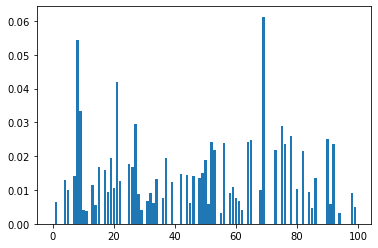

In [15]:

# get importance of each feature 
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

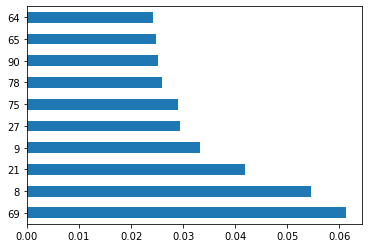

In [16]:
#selecting the first 10 importand features
importance = pd.Series(model.feature_importances_)
importance.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
# storing the dataset which only consists of important featurs and the target variable to a new csv file.
output=pd.read_csv("outputnewdata.csv",usecols=['69','8','21','9','27','75','78','90','65','64','Class'])
print(output)
output.to_csv('output.csv',  
                 index = False)

            8         9        21        27        64        65        69  \
0   -2.919639 -6.216557 -0.552584 -0.181806  1.424084 -1.136033 -0.207606   
1   -1.129611  3.195601 -0.248082 -1.021244  0.471146  0.267386 -0.768070   
2    0.393324  0.229915  0.541395  0.289113 -3.615905  2.946515  0.810932   
3   -0.397205  4.399152  0.901718  0.766162  2.767716 -4.581082  2.465279   
4    1.652762  7.673453  0.523819 -0.703148  2.773314 -2.123360 -0.643204   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.098775  2.187650 -2.137067 -1.266815 -0.587867  0.318539 -3.481963   
996 -2.274803 -3.090194 -1.855692 -0.158709 -4.085368 -5.843779 -0.876595   
997 -2.113878 -7.427621  0.004778  0.151063  1.445971  3.406411  0.584992   
998 -2.394340 -1.352014 -1.269139 -1.443376  0.239033 -2.167186  0.967865   
999 -2.044518 -4.157472 -1.370683 -1.474859 -0.481377 -3.621659 -2.890392   

           75        78        90  Class  
0   -1.357582 -0.722900 -1.91901

TASK3

In [18]:
df = pd.read_csv("output.csv")
df.head()

,8,9,21,27,64,65,69,75,78,90,Class
0,-2.919639,-6.216557,-0.552584,-0.181806,1.424084,-1.136033,-0.207606,-1.357582,-0.722900,-1.919015,1.0
1,-1.129611,3.195601,-0.248082,-1.021244,0.471146,0.267386,-0.768070,0.954386,2.492973,1.394421,0.0
2,0.393324,0.229915,0.541395,0.289113,-3.615905,2.946515,0.810932,1.081245,-0.247858,-0.290845,0.0
3,-0.397205,4.399152,0.901718,0.766162,2.767716,-4.581082,2.465279,0.119153,-1.338379,1.046033,0.0
4,1.652762,7.673453,0.523819,-0.703148,2.773314,-2.123360,-0.643204,-0.570380,3.575898,1.371734,1.0


In [19]:

y = df['Class'].to_numpy()
X = df.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)
print(X)

(1000, 10) (1000,)
[[-2.91963929e+00 -6.21655726e+00 -5.52584290e-01 ... -1.35758171e+00
  -7.22899572e-01 -1.91901539e+00]
 [-1.12961117e+00  3.19560097e+00 -2.48082181e-01 ...  9.54385553e-01
   2.49297253e+00  1.39442144e+00]
 [ 3.93323713e-01  2.29914610e-01  5.41394795e-01 ...  1.08124455e+00
  -2.47857550e-01 -2.90844765e-01]
 ...
 [-2.11387845e+00 -7.42762138e+00  4.77841372e-03 ...  5.98173821e-01
   1.43568029e+00 -2.76241292e+00]
 [-2.39433995e+00 -1.35201397e+00 -1.26913867e+00 ...  1.15219046e+00
  -1.98683152e+00 -9.81469789e-01]
 [-2.04451790e+00 -4.15747174e+00 -1.37068318e+00 ...  1.20652853e+00
   2.61232767e+00  5.18180626e-01]]


In [20]:
#unpruned tree
res_clf1=[]
print("Using Entropy")
model = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy')

for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model.fit(X_train, y_train).score(X_test, y_test))
print(res_clf1)
scores = model.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))
print('Depth:', model.get_depth())

print("Using Gini")

model = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='gini')
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model.fit(X_train, y_train).score(X_test, y_test))
scores = model.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))

print('Depth:', model.get_depth())
# here i have compared Gini and Entropy and analysed which is giving more accuracy.

Using Entropy
[0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66]
Acc on training set: 1.000
Acc on test set:     0.660
Depth: 26
Using Gini
Acc on training set: 1.000
Acc on test set:     0.620
Depth: 18


In [21]:
# Entopy is giving better score on small data set so, i have decided to go with criterion entropy.

model = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy')
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model.fit(X_train, y_train).score(X_test, y_test))
scores = model.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))

Acc on training set: 1.000
Acc on test set:     0.660


In [22]:
#calculating AUC and ploting ROC curve
proba = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])

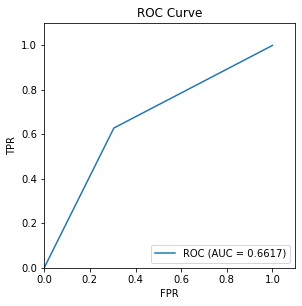

In [23]:
plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.1)
plt.ylim(0., 1.1)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [24]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_train, y_train, cv=rskf)
#res_clf2 = cross_val_score(clf2, X, y, cv=rskf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
arr = np.array(score1)
list1 = arr.tolist()
print(score1)

Score mean: 0.591, std: 0.050
[0.6625 0.575  0.55   0.575  0.6125 0.5625 0.5625 0.7375 0.65   0.6
 0.55   0.5875 0.5875 0.575  0.5875 0.6    0.55   0.5875 0.6625 0.7
 0.625  0.5875 0.6    0.5625 0.6375 0.55   0.625  0.7    0.5625 0.625
 0.575  0.525  0.625  0.45   0.5375 0.575  0.6125 0.6375 0.55   0.6125
 0.575  0.6    0.575  0.5    0.5375 0.7125 0.5625 0.5625 0.575  0.5875
 0.575  0.5875 0.525  0.625  0.6125 0.5875 0.6    0.5875 0.6375 0.5625
 0.6    0.5125 0.6125 0.55   0.7125 0.625  0.6375 0.4875 0.6625 0.6625
 0.6375 0.575  0.6125 0.5875 0.5    0.525  0.5875 0.6125 0.5625 0.5875
 0.6    0.6625 0.6125 0.6    0.625  0.6625 0.5875 0.525  0.6    0.55
 0.5    0.525  0.5875 0.5375 0.5875 0.6125 0.55   0.6125 0.6625 0.55  ]


depth: 1
Accuracy: 0.595
depth: 2
Accuracy: 0.71
depth: 3
Accuracy: 0.69
depth: 4
Accuracy: 0.675
depth: 5
Accuracy: 0.67
depth: 6
Accuracy: 0.74
depth: 7
Accuracy: 0.675
depth: 8
Accuracy: 0.69
depth: 9
Accuracy: 0.675
depth: 10
Accuracy: 0.68
depth: 11
Accuracy: 0.655
depth: 12
Accuracy: 0.68
depth: 13
Accuracy: 0.665
depth: 14
Accuracy: 0.675
depth: 15
Accuracy: 0.68
depth: 16
Accuracy: 0.645
depth: 17
Accuracy: 0.66
depth: 18
Accuracy: 0.65
depth: 19
Accuracy: 0.645
depth: 20
Accuracy: 0.665


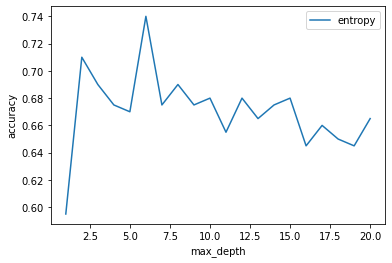

In [25]:
# pruned decision tree using different depth and analysing wich depth is giving the better accuracy using criteria entropy
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,21):
 model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 model.fit(X_train, y_train)
 pred = model.predict(X_test)
 Accuracy= accuracy_score(y_test, pred)
 acc_entropy.append(accuracy_score(y_test, pred))
 print("depth:",i )
 print("Accuracy:",Accuracy)
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
#plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [26]:
# finding the depth which giving highest accuracy using grid search cv
params = [{
    'max_depth': np.arange(2, 22), 
    'criterion': ['entropy']
}]
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search = GridSearchCV(model, params, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1345),
             param_grid=[{'criterion': ['entropy'],
                          'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])}])

In [27]:

grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)

GridSearchCV and the pruning method explained above give depth 5 and 6. For finalizing the depth finding AUC for both depth

In [28]:
model_pr = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=6)
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model_pr.fit(X_train, y_train).score(X_test, y_test))
scores = model_pr.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model_pr.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))

Acc on training set: 0.781
Acc on test set:     0.735


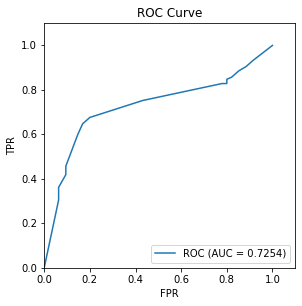

In [29]:
proba = model_pr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])
plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.1)
plt.ylim(0., 1.1)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [30]:
model_pr = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model_pr.fit(X_train, y_train).score(X_test, y_test))
scores = model_pr.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model_pr.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))

Acc on training set: 0.738
Acc on test set:     0.670


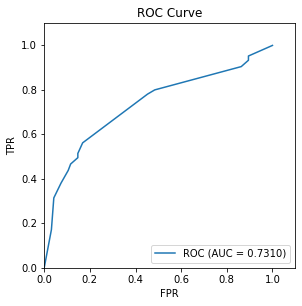

In [31]:
proba = model_pr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])
plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.1)
plt.ylim(0., 1.1)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

AUC of the depth 5 is larger than depth 6 so, i have decided to go with depth 5

In [32]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model_pr, X_train, y_train, cv=rskf)
print(model_pr)
print(score1)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
arr = np.array(score1)
list2 = arr.tolist()

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
[0.6375 0.675  0.65   0.5875 0.575  0.7    0.6125 0.6875 0.7125 0.7
 0.675  0.6375 0.575  0.675  0.6625 0.6875 0.5875 0.6375 0.6625 0.6875
 0.625  0.675  0.7125 0.5875 0.5875 0.5625 0.6125 0.6375 0.65   0.625
 0.6125 0.4625 0.6875 0.6375 0.6    0.6875 0.6625 0.5875 0.575  0.5875
 0.575  0.5875 0.675  0.5375 0.5625 0.6375 0.7    0.65   0.675  0.6
 0.6875 0.6625 0.625  0.675  0.6625 0.625  0.5125 0.5375 0.65   0.55
 0.6    0.5875 0.6125 0.6375 0.6625 0.675  0.675  0.525  0.65   0.7
 0.625  0.6125 0.6125 0.5875 0.625  0.575  0.6375 0.5625 0.65   0.6375
 0.6    0.7125 0.6625 0.6375 0.65   0.6    0.5875 0.55   0.5625 0.5625
 0.6125 0.6375 0.6625 0.6125 0.575  0.5625 0.5875 0.65   0.65   0.625 ]
Score mean: 0.625, std: 0.049


In [33]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model_rf.fit(X_train, y_train).score(X_test, y_test))

In [34]:
scores = model_rf.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model_rf.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))

Acc on training set: 0.984
Acc on test set:     0.695


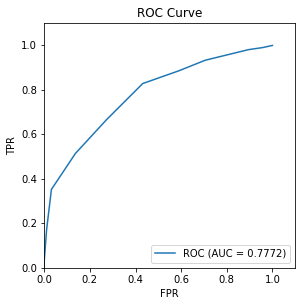

In [35]:
proba = model_rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])
plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.1)
plt.ylim(0., 1.1)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [36]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model_rf, X_train, y_train, cv=rskf)
#res_clf2 = cross_val_score(clf2, X, y, cv=rskf)
print(score1)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
arr = np.array(score1)
list3 = arr.tolist()

[0.6625 0.6625 0.6125 0.7    0.6375 0.6375 0.6375 0.7    0.6625 0.6375
 0.625  0.525  0.7    0.65   0.6    0.6375 0.575  0.5875 0.725  0.65
 0.65   0.65   0.675  0.6125 0.7125 0.5125 0.6    0.7125 0.6375 0.6625
 0.6375 0.65   0.625  0.6875 0.6375 0.6625 0.6625 0.7    0.6125 0.6875
 0.6625 0.7125 0.6875 0.5875 0.6625 0.6625 0.6125 0.6625 0.675  0.625
 0.65   0.6    0.6375 0.6625 0.7    0.6    0.65   0.6625 0.675  0.6
 0.5375 0.6125 0.675  0.625  0.6875 0.725  0.6875 0.6    0.75   0.6875
 0.65   0.725  0.6125 0.65   0.6625 0.6375 0.6125 0.6125 0.75   0.6125
 0.7    0.7    0.7375 0.7    0.625  0.6375 0.6125 0.625  0.65   0.575
 0.575  0.65   0.7125 0.675  0.725  0.575  0.575  0.5875 0.725  0.6875]
Score mean: 0.650, std: 0.048


Acc on training set: 0.619
Acc on test set:     0.595
Depth: 1


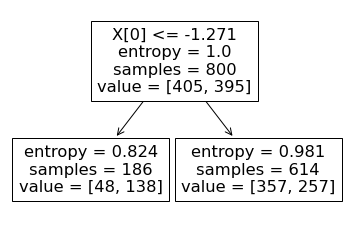

In [37]:
# decision stumb
model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    res_clf1.append(model_stumb.fit(X_train, y_train).score(X_test, y_test))

scores = model_stumb.score(X_train, y_train)
print('Acc on training set: {:.3f}'.format(scores))

scores = model_stumb.score(X_test, y_test)
print('Acc on test set:     {:.3f}'.format(scores))
print('Depth:', model_stumb.get_depth())
tree.plot_tree(model_stumb)
plt.show()

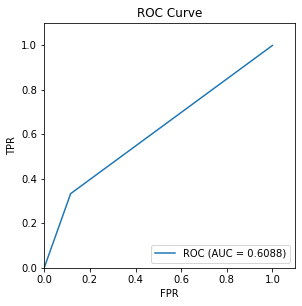

In [38]:
proba = model_stumb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
auc_score = roc_auc_score(y_test, proba[:, 1])
plt.figure(figsize=(4.5, 4.5))
plt.xlim(0., 1.1)
plt.ylim(0., 1.1)
plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [39]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model_stumb, X, y, cv=rskf)
#res_clf2 = cross_val_score(clf2, X, y, cv=rskf)
print(score1)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
arr = np.array(score1)
list4 = arr.tolist()

[0.65 0.57 0.62 0.65 0.55 0.68 0.57 0.57 0.65 0.56 0.66 0.6  0.55 0.66
 0.64 0.59 0.54 0.66 0.51 0.6  0.62 0.58 0.58 0.58 0.6  0.62 0.59 0.54
 0.65 0.61 0.62 0.61 0.62 0.58 0.58 0.63 0.57 0.59 0.65 0.55 0.63 0.6
 0.6  0.59 0.6  0.59 0.65 0.64 0.6  0.6  0.62 0.62 0.64 0.62 0.64 0.61
 0.67 0.57 0.54 0.58 0.6  0.64 0.62 0.55 0.59 0.58 0.62 0.57 0.62 0.66
 0.65 0.61 0.64 0.64 0.62 0.55 0.61 0.57 0.59 0.63 0.62 0.59 0.52 0.67
 0.59 0.58 0.69 0.64 0.62 0.62 0.59 0.61 0.6  0.62 0.51 0.64 0.65 0.61
 0.64 0.64]
Score mean: 0.607, std: 0.037


In [40]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb
0   0.6625    0.6375    0.6625         0.65
1   0.5750    0.6750    0.6625         0.57
2   0.5500    0.6500    0.6125         0.62
3   0.5750    0.5875    0.7000         0.65
4   0.6125    0.5750    0.6375         0.55
..     ...       ...       ...          ...
95  0.6125    0.5625    0.5750         0.64
96  0.5500    0.5875    0.5750         0.65
97  0.6125    0.6500    0.5875         0.61
98  0.6625    0.6500    0.7250         0.64
99  0.5500    0.6250    0.6875         0.64

[100 rows x 4 columns]


RankResult(rankdf=
             meanrank      mean       std  ci_lower  ci_upper effect_size  \
model_rf         1.78  0.649625  0.047985  0.637417  0.661833         0.0   
model_pr         2.29  0.625375  0.049634  0.612747  0.638003    0.496757   
model_stumb      2.77  0.606700  0.037553  0.597146  0.616254    0.996266   
model            3.16  0.591375  0.050711  0.578473  0.604277    1.179937   

              magnitude  
model_rf     negligible  
model_pr          small  
model_stumb       large  
model             large  
pvalue=2.8060188186366057e-14
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.16900143027305603, 0.0427287220954895, 0.26446646451950073, 0.15458041429519653]
homoscedastic=False
pval_homogeneity=0.01496944721379457
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=cohen_d)
The statistical analysis was conducted fo

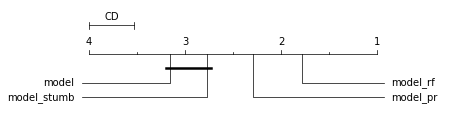

In [41]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

TASK 4

In [42]:
df = pd.read_csv("output.csv")
df.head()
y = df['Class'].to_numpy()
X = df.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)
print(X)

(1000, 10) (1000,)
[[-2.91963929e+00 -6.21655726e+00 -5.52584290e-01 ... -1.35758171e+00
  -7.22899572e-01 -1.91901539e+00]
 [-1.12961117e+00  3.19560097e+00 -2.48082181e-01 ...  9.54385553e-01
   2.49297253e+00  1.39442144e+00]
 [ 3.93323713e-01  2.29914610e-01  5.41394795e-01 ...  1.08124455e+00
  -2.47857550e-01 -2.90844765e-01]
 ...
 [-2.11387845e+00 -7.42762138e+00  4.77841372e-03 ...  5.98173821e-01
   1.43568029e+00 -2.76241292e+00]
 [-2.39433995e+00 -1.35201397e+00 -1.26913867e+00 ...  1.15219046e+00
  -1.98683152e+00 -9.81469789e-01]
 [-2.04451790e+00 -4.15747174e+00 -1.37068318e+00 ...  1.20652853e+00
   2.61232767e+00  5.18180626e-01]]


In [43]:
np.random.seed(RANDOM_STATE)

noise = np.random.normal(0, 0.2, np.shape(X))
X_noise = X + np.multiply(noise, np.average(X, axis=0))


DecisionTreeClassifier(criterion='entropy', random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.67
Accuracy on train set: 1.00
Accuracy on test set: 0.67
              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65        95
         1.0       0.68      0.70      0.69       105

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



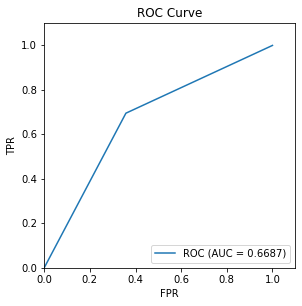



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.72
Accuracy on train set: 0.75
Accuracy on test set: 0.72
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75        95
         1.0       0.85      0.57      0.68       105

    accuracy                           0.72       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.72      0.71       200



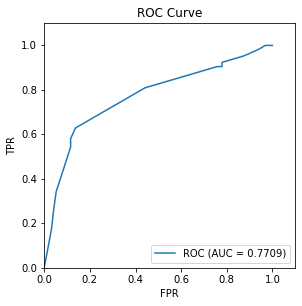



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
The accuracy of model RandomForestClassifier is 0.71
Accuracy on train set: 0.97
Accuracy on test set: 0.71
              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72        95
         1.0       0.77      0.66      0.71       105

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



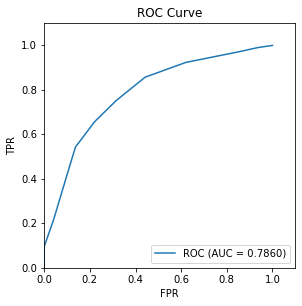



DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.58
Accuracy on train set: 0.62
Accuracy on test set: 0.58
              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67        95
         1.0       0.74      0.30      0.43       105

    accuracy                           0.58       200
   macro avg       0.64      0.59      0.55       200
weighted avg       0.64      0.58      0.54       200



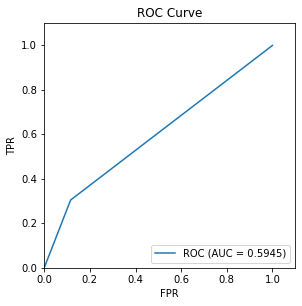

In [44]:
noise_model= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy') # using the random state for reproducibility
noise_model_pr= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
noise_model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
noise_model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)

# now, create a list with the objects 
models= [noise_model,noise_model_pr,noise_model_rf,noise_model_stumb]

for mode in models:
    print(mode)
    for iteration in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=0.2, random_state=RANDOM_STATE)
        mode.fit(X_train, y_train).score(X_test, y_test)
    y_pred= mode.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(mode).__name__} is {accuracy:.2f}")
    score = mode.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = mode.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = mode.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")

In [45]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_train, y_train, cv=rskf)
score2 = cross_val_score(model_pr, X_train, y_train, cv=rskf)
score3 = cross_val_score(model_rf, X_train, y_train, cv=rskf)
score4 = cross_val_score(model_stumb, X_train, y_train, cv=rskf)
#print(score1)
print(model)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
print(model_pr)
print('Score mean: {:.3f}, std: {:.3f}'.format(score2.mean(), score2.std()))
print(model_rf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score3.mean(), score3.std()))
print(model_stumb)
print('Score mean: {:.3f}, std: {:.3f}'.format(score4.mean(), score4.std()))
arr1 = np.array(score1)
arr2 = np.array(score2)
arr3 = np.array(score3)
arr4 = np.array(score4)
list5 = arr1.tolist()
list6 = arr2.tolist()
list7 = arr3.tolist()
list8 = arr4.tolist()

DecisionTreeClassifier(random_state=1345)
Score mean: 0.597, std: 0.050
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
Score mean: 0.632, std: 0.050
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
Score mean: 0.653, std: 0.050
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
Score mean: 0.616, std: 0.039


In [46]:
data = {
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

    noise_model  noise_model_pr  noise_model_rf  noise_model_stumb
0        0.5750          0.6625          0.5625             0.6125
1        0.6000          0.6500          0.7250             0.6875
2        0.5500          0.6375          0.6125             0.6500
3        0.6125          0.6875          0.6125             0.5500
4        0.5250          0.5250          0.6250             0.6000
..          ...             ...             ...                ...
95       0.5875          0.6000          0.6000             0.5875
96       0.5125          0.5875          0.5750             0.6625
97       0.7250          0.6625          0.6625             0.6125
98       0.6125          0.7125          0.6625             0.6625
99       0.5875          0.6000          0.6875             0.5625

[100 rows x 4 columns]


RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
noise_model_rf        1.805  0.653375  0.050373  0.640559  0.666191   
noise_model_pr        2.255  0.631625  0.050329  0.618821  0.644429   
noise_model_stumb     2.835  0.615875  0.039483   0.60583   0.62592   
noise_model           3.105  0.596875  0.050075  0.584135  0.609615   

                  effect_size   magnitude  
noise_model_rf            0.0  negligible  
noise_model_pr       0.431969       small  
noise_model_stumb     0.82861       large  
noise_model          1.124958       large  
pvalue=5.601378676282923e-14
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.4596874713897705, 0.22844654321670532, 0.3864205777645111, 0.05041137710213661]
homoscedastic=False
pval_homogeneity=0.04786445340986717
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effe

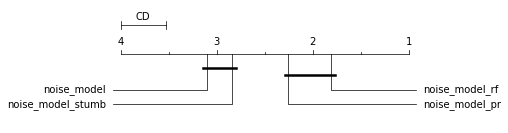

In [47]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

models performace on both clean and noisy data

In [48]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4,
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb','noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb  noise_model  noise_model_pr  \
0   0.6625    0.6375    0.6625         0.65       0.5750          0.6625   
1   0.5750    0.6750    0.6625         0.57       0.6000          0.6500   
2   0.5500    0.6500    0.6125         0.62       0.5500          0.6375   
3   0.5750    0.5875    0.7000         0.65       0.6125          0.6875   
4   0.6125    0.5750    0.6375         0.55       0.5250          0.5250   
..     ...       ...       ...          ...          ...             ...   
95  0.6125    0.5625    0.5750         0.64       0.5875          0.6000   
96  0.5500    0.5875    0.5750         0.65       0.5125          0.5875   
97  0.6125    0.6500    0.5875         0.61       0.7250          0.6625   
98  0.6625    0.6500    0.7250         0.64       0.6125          0.7125   
99  0.5500    0.6250    0.6875         0.64       0.5875          0.6000   

    noise_model_rf  noise_model_stumb  
0           0.5625             0.6125  
1      

RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
noise_model_rf        2.940  0.653375  0.050373    0.6393   0.66745   
model_rf              3.155  0.649625  0.047985  0.636218  0.663032   
noise_model_pr        3.985  0.631625  0.050329  0.617563  0.645687   
model_pr              4.265  0.625375  0.049634  0.611507  0.639243   
noise_model_stumb     4.875  0.615875  0.039483  0.604843  0.626907   
model_stumb           5.145  0.606700  0.037553  0.596207  0.617193   
noise_model           5.705  0.596875  0.050075  0.582884  0.610866   
model                 5.930  0.591375  0.050711  0.577206  0.605544   

                  effect_size   magnitude  
noise_model_rf            0.0  negligible  
model_rf              0.07623  negligible  
noise_model_pr       0.431969       small  
model_pr             0.559945      medium  
noise_model_stumb     0.82861       large  
model_stumb          1.050584       large  
noise_model          1.124958    

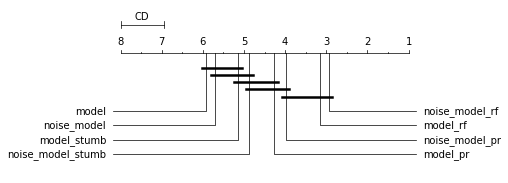

In [49]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

TASK 5

In [50]:
df = pd.read_csv("output.csv")
df.head()
y = df['Class'].to_numpy()
X = df.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)
print(X)

(1000, 10) (1000,)
[[-2.91963929e+00 -6.21655726e+00 -5.52584290e-01 ... -1.35758171e+00
  -7.22899572e-01 -1.91901539e+00]
 [-1.12961117e+00  3.19560097e+00 -2.48082181e-01 ...  9.54385553e-01
   2.49297253e+00  1.39442144e+00]
 [ 3.93323713e-01  2.29914610e-01  5.41394795e-01 ...  1.08124455e+00
  -2.47857550e-01 -2.90844765e-01]
 ...
 [-2.11387845e+00 -7.42762138e+00  4.77841372e-03 ...  5.98173821e-01
   1.43568029e+00 -2.76241292e+00]
 [-2.39433995e+00 -1.35201397e+00 -1.26913867e+00 ...  1.15219046e+00
  -1.98683152e+00 -9.81469789e-01]
 [-2.04451790e+00 -4.15747174e+00 -1.37068318e+00 ...  1.20652853e+00
   2.61232767e+00  5.18180626e-01]]


In [51]:
np.random.seed(RANDOM_STATE)
noise = np.random.normal(1, 0.2, np.shape(X))
X_noise_mul = np.multiply(X, noise)

DecisionTreeClassifier(criterion='entropy', random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.63
Accuracy on train set: 1.00
Accuracy on test set: 0.63
              precision    recall  f1-score   support

         0.0       0.62      0.57      0.59        95
         1.0       0.64      0.69      0.66       105

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



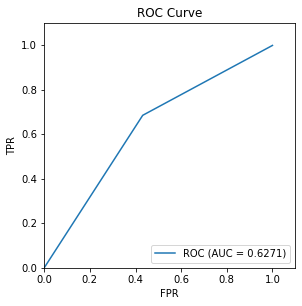



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.68
Accuracy on train set: 0.74
Accuracy on test set: 0.68
              precision    recall  f1-score   support

         0.0       0.62      0.79      0.70        95
         1.0       0.75      0.57      0.65       105

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



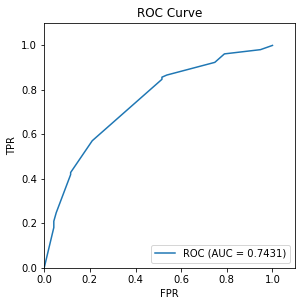



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
The accuracy of model RandomForestClassifier is 0.72
Accuracy on train set: 0.98
Accuracy on test set: 0.72
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73        95
         1.0       0.78      0.66      0.72       105

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200



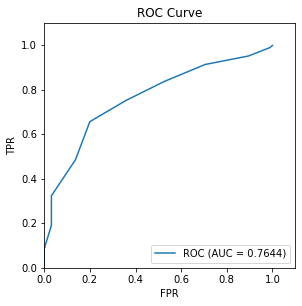



DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.60
Accuracy on train set: 0.63
Accuracy on test set: 0.60
              precision    recall  f1-score   support

         0.0       0.55      0.84      0.67        95
         1.0       0.73      0.38      0.50       105

    accuracy                           0.60       200
   macro avg       0.64      0.61      0.58       200
weighted avg       0.64      0.60      0.58       200



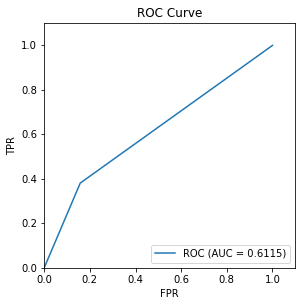

In [52]:
noise_model= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy') # using the random state for reproducibility
noise_model_pr= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
noise_model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
noise_model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)

# now, create a list with the objects 
models= [noise_model,noise_model_pr,noise_model_rf,noise_model_stumb]

for mode in models:
    print(mode)
    for iteration in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X_noise_mul, y, test_size=0.2, random_state=RANDOM_STATE)
        mode.fit(X_train, y_train).score(X_test, y_test)
    y_pred= mode.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(mode).__name__} is {accuracy:.2f}")
    score = mode.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = mode.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = mode.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")

In [53]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_train, y_train, cv=rskf)
score2 = cross_val_score(model_pr, X_train, y_train, cv=rskf)
score3 = cross_val_score(model_rf, X_train, y_train, cv=rskf)
score4 = cross_val_score(model_stumb, X_train, y_train, cv=rskf)
#print(score1)
print(model)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
print(model_pr)
print('Score mean: {:.3f}, std: {:.3f}'.format(score2.mean(), score2.std()))
print(model_rf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score3.mean(), score3.std()))
print(model_stumb)
print('Score mean: {:.3f}, std: {:.3f}'.format(score4.mean(), score4.std()))
arr1 = np.array(score1)
arr2 = np.array(score2)
arr3 = np.array(score3)
arr4 = np.array(score4)
list5 = arr1.tolist()
list6 = arr2.tolist()
list7 = arr3.tolist()
list8 = arr4.tolist()

DecisionTreeClassifier(random_state=1345)
Score mean: 0.608, std: 0.057
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
Score mean: 0.648, std: 0.052
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
Score mean: 0.647, std: 0.050
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
Score mean: 0.625, std: 0.040


In [54]:
data = {
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

    noise_model  noise_model_pr  noise_model_rf  noise_model_stumb
0        0.5375          0.6250          0.6000             0.6375
1        0.6000          0.6875          0.7500             0.6625
2        0.6000          0.6500          0.7000             0.6750
3        0.5375          0.6625          0.6375             0.5750
4        0.5125          0.6125          0.6250             0.5750
..          ...             ...             ...                ...
95       0.6250          0.6000          0.6625             0.5875
96       0.5625          0.4750          0.6625             0.6250
97       0.5875          0.6500          0.6250             0.6125
98       0.6125          0.6125          0.6000             0.6500
99       0.5375          0.6875          0.6500             0.6250

[100 rows x 4 columns]


RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
noise_model_pr        2.045  0.647875  0.051922  0.634665  0.661085   
noise_model_rf        2.150  0.646625  0.049995  0.633905  0.659345   
noise_model_stumb     2.740  0.625000  0.040475  0.614702  0.635298   
noise_model           3.065  0.608375  0.056800  0.593924  0.622826   

                  effect_size   magnitude  
noise_model_pr            0.0  negligible  
noise_model_rf       0.024525  negligible  
noise_model_stumb    0.491388       small  
noise_model          0.725898      medium  
pvalue=1.6789667654868061e-09
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.14718365669250488, 0.27728697657585144, 0.21187283098697662, 0.4649565517902374]
homoscedastic=False
pval_homogeneity=0.009470055521297335
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
e

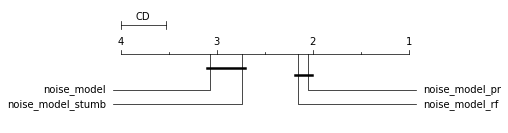

In [55]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

models performace on clean and noisy data

In [56]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4,
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb','noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb  noise_model  noise_model_pr  \
0   0.6625    0.6375    0.6625         0.65       0.5375          0.6250   
1   0.5750    0.6750    0.6625         0.57       0.6000          0.6875   
2   0.5500    0.6500    0.6125         0.62       0.6000          0.6500   
3   0.5750    0.5875    0.7000         0.65       0.5375          0.6625   
4   0.6125    0.5750    0.6375         0.55       0.5125          0.6125   
..     ...       ...       ...          ...          ...             ...   
95  0.6125    0.5625    0.5750         0.64       0.6250          0.6000   
96  0.5500    0.5875    0.5750         0.65       0.5625          0.4750   
97  0.6125    0.6500    0.5875         0.61       0.5875          0.6500   
98  0.6625    0.6500    0.7250         0.64       0.6125          0.6125   
99  0.5500    0.6250    0.6875         0.64       0.5375          0.6875   

    noise_model_rf  noise_model_stumb  
0           0.6000             0.6375  
1      

RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
model_rf              3.330  0.649625  0.047985  0.636218  0.663032   
noise_model_pr        3.395  0.647875  0.051922  0.633368  0.662382   
noise_model_rf        3.450  0.646625  0.049995  0.632656  0.660594   
model_pr              4.435  0.625375  0.049634  0.611507  0.639243   
noise_model_stumb     4.610  0.625000  0.040475  0.613691  0.636309   
noise_model           5.250  0.608375  0.056800  0.592505  0.624245   
model_stumb           5.480  0.606700  0.037553  0.596207  0.617193   
model                 6.050  0.591375  0.050711  0.577206  0.605544   

                  effect_size   magnitude  
model_rf                  0.0  negligible  
noise_model_pr       0.035005  negligible  
noise_model_rf       0.061224  negligible  
model_pr             0.496757       small  
noise_model_stumb     0.55475      medium  
noise_model          0.784558      medium  
model_stumb          0.996266    

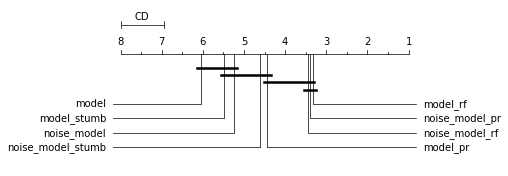

In [57]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

Multiplicative noise will affect the model more the additive noise. Because multiplicative noise is hrder to remove than additive noise.

TASK 6

In [58]:
np.random.seed(RANDOM_STATE)
size=y.shape[0]
indexes = np.random.randint(low=0, high=999, size=int(0.05*size))
size1=int(0.05*size)
for i in range(size1):
  temp = labels.iloc[indexes[i]][0]
  labels.iloc[indexes[i]][0] = not temp
  #print(labels.iloc[indexes[i]][0])
y_noise= labels['Class'].to_numpy()

DecisionTreeClassifier(criterion='entropy', random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.64
Accuracy on train set: 1.00
Accuracy on test set: 0.64
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63        95
         1.0       0.66      0.64      0.65       105

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



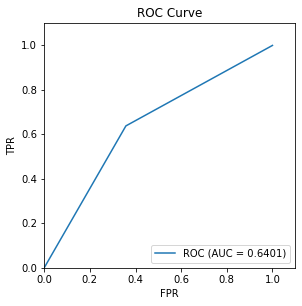



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.69
Accuracy on train set: 0.75
Accuracy on test set: 0.69
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68        95
         1.0       0.72      0.70      0.71       105

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.70       200



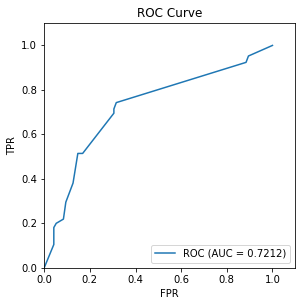



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
The accuracy of model RandomForestClassifier is 0.71
Accuracy on train set: 0.97
Accuracy on test set: 0.71
              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72        95
         1.0       0.77      0.64      0.70       105

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



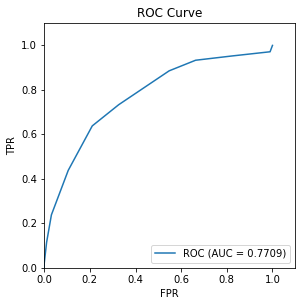



DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.59
Accuracy on train set: 0.62
Accuracy on test set: 0.59
              precision    recall  f1-score   support

         0.0       0.55      0.88      0.67        95
         1.0       0.76      0.33      0.46       105

    accuracy                           0.59       200
   macro avg       0.65      0.61      0.57       200
weighted avg       0.66      0.59      0.56       200



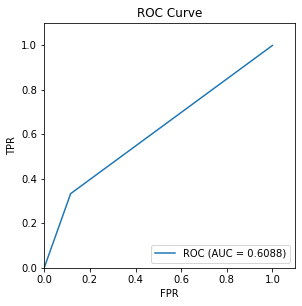

In [59]:
noise_model= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy') # using the random state for reproducibility
noise_model_pr= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
noise_model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
noise_model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)

# now, create a list with the objects 
models= [noise_model,noise_model_pr,noise_model_rf,noise_model_stumb]

for mode in models:
    print(mode)
    for iteration in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.2, random_state=RANDOM_STATE)
        res_clf1.append(mode.fit(X_train, y_train).score(X_test, y_test))
    y_pred= mode.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(mode).__name__} is {accuracy:.2f}")
    score = mode.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = mode.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = mode.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")

In [60]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_train, y_train, cv=rskf)
score2 = cross_val_score(model_pr, X_train, y_train, cv=rskf)
score3 = cross_val_score(model_rf, X_train, y_train, cv=rskf)
score4 = cross_val_score(model_stumb, X_train, y_train, cv=rskf)
#print(score1)
print(model)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
print(model_pr)
print('Score mean: {:.3f}, std: {:.3f}'.format(score2.mean(), score2.std()))
print(model_rf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score3.mean(), score3.std()))
print(model_stumb)
print('Score mean: {:.3f}, std: {:.3f}'.format(score4.mean(), score4.std()))
arr1 = np.array(score1)
arr2 = np.array(score2)
arr3 = np.array(score3)
arr4 = np.array(score4)
list5 = arr1.tolist()
list6 = arr2.tolist()
list7 = arr3.tolist()
list8 = arr4.tolist()

DecisionTreeClassifier(random_state=1345)
Score mean: 0.584, std: 0.056
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
Score mean: 0.626, std: 0.047
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
Score mean: 0.627, std: 0.051
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
Score mean: 0.612, std: 0.042


In [61]:
data = {
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

    noise_model  noise_model_pr  noise_model_rf  noise_model_stumb
0        0.5375          0.5750          0.7000             0.6125
1        0.5250          0.5375          0.6000             0.6250
2        0.5000          0.6750          0.6250             0.6375
3        0.4875          0.6125          0.5250             0.5750
4        0.4875          0.6125          0.6125             0.5750
..          ...             ...             ...                ...
95       0.5500          0.5375          0.5750             0.6125
96       0.5750          0.7250          0.6500             0.7250
97       0.5000          0.6000          0.6000             0.5750
98       0.5625          0.6625          0.6125             0.6250
99       0.5625          0.5500          0.6000             0.5500

[100 rows x 4 columns]


RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
noise_model_pr         2.15  0.626000  0.047497  0.613916  0.638084   
noise_model_rf         2.17  0.626875  0.050826  0.613944  0.639806   
noise_model_stumb      2.54  0.612250  0.042380  0.601468  0.623032   
noise_model            3.14  0.584250  0.056425  0.569895  0.598605   

                  effect_size   magnitude  
noise_model_pr            0.0  negligible  
noise_model_rf      -0.017788  negligible  
noise_model_stumb    0.305482       small  
noise_model          0.800541       large  
pvalue=9.067436268583422e-09
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.6334297060966492, 0.06603206694126129, 0.23303921520709991, 0.07278371602296829]
homoscedastic=False
pval_homogeneity=0.03736345462803734
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
eff

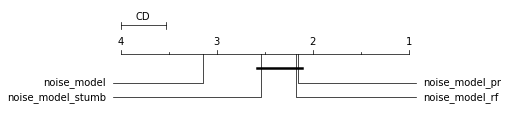

In [62]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

In [63]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4,
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb','noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb  noise_model  noise_model_pr  \
0   0.6625    0.6375    0.6625         0.65       0.5375          0.5750   
1   0.5750    0.6750    0.6625         0.57       0.5250          0.5375   
2   0.5500    0.6500    0.6125         0.62       0.5000          0.6750   
3   0.5750    0.5875    0.7000         0.65       0.4875          0.6125   
4   0.6125    0.5750    0.6375         0.55       0.4875          0.6125   
..     ...       ...       ...          ...          ...             ...   
95  0.6125    0.5625    0.5750         0.64       0.5500          0.5375   
96  0.5500    0.5875    0.5750         0.65       0.5750          0.7250   
97  0.6125    0.6500    0.5875         0.61       0.5000          0.6000   
98  0.6625    0.6500    0.7250         0.64       0.5625          0.6625   
99  0.5500    0.6250    0.6875         0.64       0.5625          0.5500   

    noise_model_rf  noise_model_stumb  
0           0.7000             0.6125  
1      

RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
model_rf              3.005  0.649625  0.047985  0.636218  0.663032   
model_pr              3.940  0.625375  0.049634  0.611507  0.639243   
noise_model_rf        4.015  0.626875  0.050826  0.612674  0.641076   
noise_model_pr        4.025  0.626000  0.047497  0.612729  0.639271   
noise_model_stumb     4.685  0.612250  0.042380  0.600409  0.624091   
model_stumb           4.845  0.606700  0.037553  0.596207  0.617193   
model                 5.635  0.591375  0.050711  0.577206  0.605544   
noise_model           5.850  0.584250  0.056425  0.568484  0.600016   

                  effect_size   magnitude  
model_rf                  0.0  negligible  
model_pr             0.496757       small  
noise_model_rf       0.460286       small  
noise_model_pr       0.494852       small  
noise_model_stumb    0.825617       large  
model_stumb          0.996266       large  
model                1.179937    

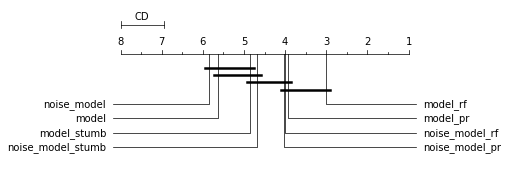

In [64]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

Class noise and the Feature noise affect the classifiers differently. Both will will reduce the accuracy of classifiers and increase the training time of the classifiers. Class noise imapcts the classifier more that feature noise. I have analysed 5% of class noise and 20% feature noise, both of them give almost same accuracy. so, when the class noise will increase it will again reduce the accuracy of the model.

TASK 7

In [65]:
df = pd.read_csv("output.csv")
df.head()
y = df['Class'].to_numpy()
X = df.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)

(1000, 10) (1000,)


In [66]:
np.random.seed(RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
noise = np.random.normal(1, 0.2, np.shape(X_train))
#X_noise = np.multiply(X_train, noise)

DecisionTreeClassifier(criterion='entropy', random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.69
Accuracy on train set: 0.82
Accuracy on test set: 0.69
              precision    recall  f1-score   support

         0.0       0.69      0.64      0.67        95
         1.0       0.70      0.74      0.72       105

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



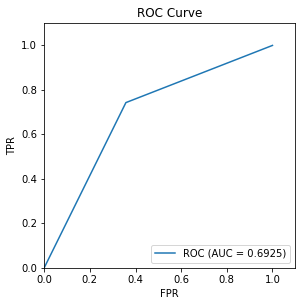



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.68
Accuracy on train set: 0.71
Accuracy on test set: 0.68
              precision    recall  f1-score   support

         0.0       0.63      0.80      0.70        95
         1.0       0.76      0.57      0.65       105

    accuracy                           0.68       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.70      0.68      0.68       200



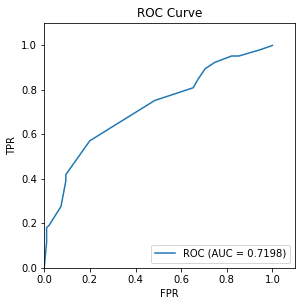



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
The accuracy of model RandomForestClassifier is 0.67
Accuracy on train set: 0.86
Accuracy on test set: 0.67
              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69        95
         1.0       0.73      0.58      0.65       105

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



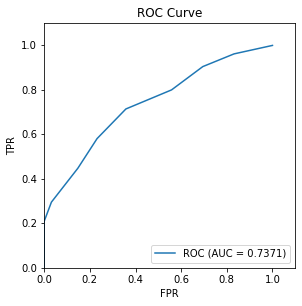



DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.58
Accuracy on train set: 0.61
Accuracy on test set: 0.58
              precision    recall  f1-score   support

         0.0       0.54      0.91      0.67        95
         1.0       0.78      0.30      0.43       105

    accuracy                           0.58       200
   macro avg       0.66      0.60      0.55       200
weighted avg       0.66      0.58      0.54       200



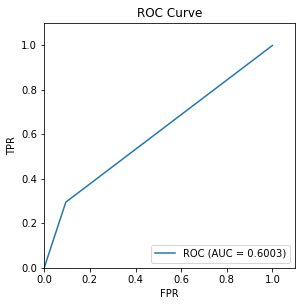

In [67]:
noise_model= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy') # using the random state for reproducibility
noise_model_pr= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
noise_model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
noise_model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)

# now, create a list with the objects 
models= [noise_model,noise_model_pr,noise_model_rf,noise_model_stumb]

for mode in models:
    print(mode)
    for iteration in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
        X_noise = np.multiply(X_train, noise)
        mode.fit(X_noise, y_train).score(X_test, y_test)
    y_pred= mode.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(mode).__name__} is {accuracy:.2f}")
    score = mode.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = mode.score(X_test, y_test)
    print('Accuracy on test set: {:.2f}'.format(score))
    print(clf_report)
    proba = mode.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")

In [68]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_noise, y_train, cv=rskf)
score2 = cross_val_score(model_pr, X_noise, y_train, cv=rskf)
score3 = cross_val_score(model_rf, X_noise, y_train, cv=rskf)
score4 = cross_val_score(model_stumb, X_noise, y_train, cv=rskf)
#print(score1)
print(model)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
print(model_pr)
print('Score mean: {:.3f}, std: {:.3f}'.format(score2.mean(), score2.std()))
print(model_rf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score3.mean(), score3.std()))
print(model_stumb)
print('Score mean: {:.3f}, std: {:.3f}'.format(score4.mean(), score4.std()))
arr1 = np.array(score1)
arr2 = np.array(score2)
arr3 = np.array(score3)
arr4 = np.array(score4)
list5 = arr1.tolist()
list6 = arr2.tolist()
list7 = arr3.tolist()
list8 = arr4.tolist()

DecisionTreeClassifier(random_state=1345)
Score mean: 0.585, std: 0.059
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
Score mean: 0.616, std: 0.055
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
Score mean: 0.635, std: 0.050
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
Score mean: 0.578, std: 0.039


In [69]:
data = {
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

    noise_model  noise_model_pr  noise_model_rf  noise_model_stumb
0        0.6125          0.6000          0.6750             0.5375
1        0.6375          0.6375          0.6875             0.6500
2        0.6250          0.6000          0.6375             0.5250
3        0.5375          0.5250          0.6250             0.5500
4        0.5875          0.5250          0.6000             0.5375
..          ...             ...             ...                ...
95       0.5375          0.5750          0.6250             0.5875
96       0.6000          0.4875          0.6125             0.6000
97       0.5125          0.6250          0.6625             0.5125
98       0.5750          0.6000          0.6125             0.6000
99       0.6250          0.6625          0.6875             0.5625

[100 rows x 4 columns]


RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
noise_model_rf        1.745  0.634875  0.050355  0.622064  0.647686   
noise_model_pr        2.200  0.616125  0.054856  0.602169  0.630081   
noise_model           2.950  0.585250  0.059309  0.570161  0.600339   
noise_model_stumb     3.105  0.577500  0.039167  0.567535  0.587465   

                  effect_size   magnitude  
noise_model_rf            0.0  negligible  
noise_model_pr       0.356101       small  
noise_model          0.902029       large  
noise_model_stumb    1.271903       large  
pvalue=1.0921164457103575e-16
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.2586713433265686, 0.3202856183052063, 0.08690430223941803, 0.061998605728149414]
homoscedastic=False
pval_homogeneity=0.0005179583739302941
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None


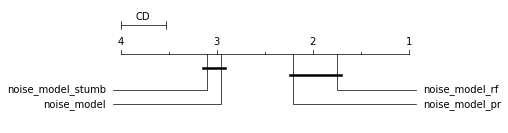

In [70]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

In [71]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4,
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb','noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb  noise_model  noise_model_pr  \
0   0.6625    0.6375    0.6625         0.65       0.6125          0.6000   
1   0.5750    0.6750    0.6625         0.57       0.6375          0.6375   
2   0.5500    0.6500    0.6125         0.62       0.6250          0.6000   
3   0.5750    0.5875    0.7000         0.65       0.5375          0.5250   
4   0.6125    0.5750    0.6375         0.55       0.5875          0.5250   
..     ...       ...       ...          ...          ...             ...   
95  0.6125    0.5625    0.5750         0.64       0.5375          0.5750   
96  0.5500    0.5875    0.5750         0.65       0.6000          0.4875   
97  0.6125    0.6500    0.5875         0.61       0.5125          0.6250   
98  0.6625    0.6500    0.7250         0.64       0.5750          0.6000   
99  0.5500    0.6250    0.6875         0.64       0.6250          0.6625   

    noise_model_rf  noise_model_stumb  
0           0.6750             0.5375  
1      

RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
model_rf              2.750  0.649625  0.047985  0.636218  0.663032   
noise_model_rf        3.265  0.634875  0.050355  0.620805  0.648945   
model_pr              3.760  0.625375  0.049634  0.611507  0.639243   
noise_model_pr        4.275  0.616125  0.054856  0.600798  0.631452   
model_stumb           4.655  0.606700  0.037553  0.596207  0.617193   
model                 5.520  0.591375  0.050711  0.577206  0.605544   
noise_model           5.745  0.585250  0.059309  0.568678  0.601822   
noise_model_stumb     6.030  0.577500  0.039167  0.566556  0.588444   

                  effect_size   magnitude  
model_rf                  0.0  negligible  
noise_model_rf       0.299891       small  
model_pr             0.496757       small  
noise_model_pr       0.650044      medium  
model_stumb          0.996266       large  
model                1.179937       large  
noise_model          1.193339    

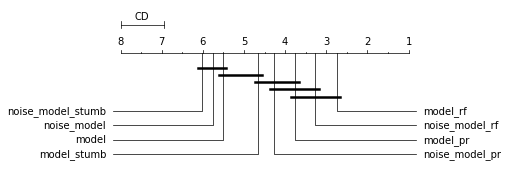

In [72]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)

In [73]:
df = pd.read_csv("output.csv")
df.head()
y = df['Class'].to_numpy()
X = df.drop(['Class'], axis=1).to_numpy()

print(X.shape, y.shape)

(1000, 10) (1000,)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [75]:
np.random.seed(RANDOM_STATE)
noise = np.random.normal(1, 0.2, np.shape(X_test))
X_noise = np.multiply(X_test, noise)

DecisionTreeClassifier(criterion='entropy', random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.67
Accuracy on train set: 1.00
Accuracy on test set: 0.67
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67        95
         1.0       0.71      0.62      0.66       105

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



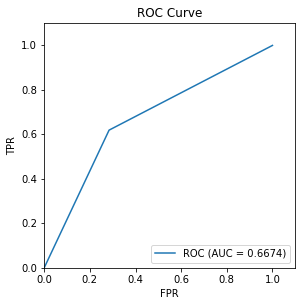



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.67
Accuracy on train set: 0.74
Accuracy on test set: 0.67
              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        95
         1.0       0.66      0.77      0.71       105

    accuracy                           0.67       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200



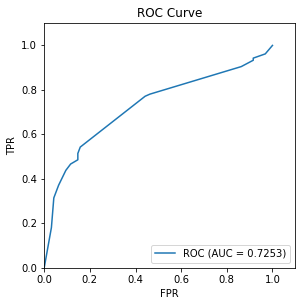



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
The accuracy of model RandomForestClassifier is 0.72
Accuracy on train set: 0.98
Accuracy on test set: 0.72
              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73        95
         1.0       0.78      0.66      0.71       105

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



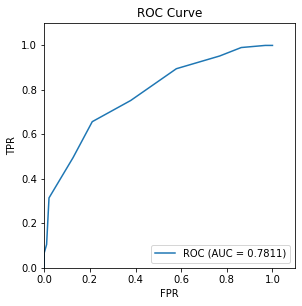



DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
The accuracy of model DecisionTreeClassifier is 0.58
Accuracy on train set: 0.62
Accuracy on test set: 0.58
              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67        95
         1.0       0.74      0.30      0.43       105

    accuracy                           0.58       200
   macro avg       0.64      0.59      0.55       200
weighted avg       0.64      0.58      0.54       200



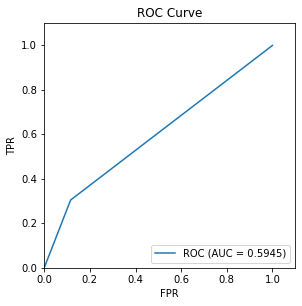

In [76]:
noise_model= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy') # using the random state for reproducibility
noise_model_pr= DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=5)
noise_model_rf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_STATE,criterion='entropy')
noise_model_stumb = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion='entropy', max_depth=1)

# now, create a list with the objects 
models= [noise_model,noise_model_pr,noise_model_rf,noise_model_stumb]

for mode in models:
    print(mode)
    for iteration in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
        mode.fit(X_train, y_train).score(X_test, y_test)
    X_noise = np.multiply(X_test, noise)
    #print(res_clf1)
    y_pred= mode.predict(X_noise) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(mode).__name__} is {accuracy:.2f}")
    score = mode.score(X_train, y_train)
    print('Accuracy on train set: {:.2f}'.format(score))
    score = mode.score(X_noise, y_test)
    print('Accuracy on test set: {:.2f}'.format(score)) 
    print(clf_report)
    proba = mode.predict_proba(X_noise)
    fpr, tpr, threshold = roc_curve(y_test, proba[:, 1])
    auc_score = roc_auc_score(y_test, proba[:, 1])
    plt.figure(figsize=(4.5, 4.5))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fpr, tpr, label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    print("\n")

In [77]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10,random_state=RANDOM_STATE)
score1 = cross_val_score(model, X_train, y_train, cv=rskf)
score2 = cross_val_score(model_pr, X_train, y_train, cv=rskf)
score3 = cross_val_score(model_rf, X_train, y_train, cv=rskf)
score4 = cross_val_score(model_stumb, X_train, y_train, cv=rskf)
#print(score1)
print(model)
print('Score mean: {:.3f}, std: {:.3f}'.format(score1.mean(), score1.std()))
print(model_pr)
print('Score mean: {:.3f}, std: {:.3f}'.format(score2.mean(), score2.std()))
print(model_rf)
print('Score mean: {:.3f}, std: {:.3f}'.format(score3.mean(), score3.std()))
print(model_stumb)
print('Score mean: {:.3f}, std: {:.3f}'.format(score4.mean(), score4.std()))
arr1 = np.array(score1)
arr2 = np.array(score2)
arr3 = np.array(score3)
arr4 = np.array(score4)
list5 = arr1.tolist()
list6 = arr2.tolist()
list7 = arr3.tolist()
list8 = arr4.tolist()

DecisionTreeClassifier(random_state=1345)
Score mean: 0.596, std: 0.055
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1345)
Score mean: 0.625, std: 0.049
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1345)
Score mean: 0.650, std: 0.048
DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1345)
Score mean: 0.614, std: 0.039


In [78]:
data = {'model': list1,
        'model_pr': list2,
        'model_rf': list3,
        'model_stumb': list4,
        'noise_model': list5,
        'noise_model_pr': list6,
        'noise_model_rf': list7,
        'noise_model_stumb': list8
      }
#df = pd.DataFrame()
df = pd.DataFrame(data, columns = ['model','model_pr','model_rf','model_stumb','noise_model','noise_model_pr','noise_model_rf','noise_model_stumb'])
print(df)

     model  model_pr  model_rf  model_stumb  noise_model  noise_model_pr  \
0   0.6625    0.6375    0.6625         0.65       0.6250          0.6375   
1   0.5750    0.6750    0.6625         0.57       0.5875          0.6750   
2   0.5500    0.6500    0.6125         0.62       0.5875          0.6500   
3   0.5750    0.5875    0.7000         0.65       0.6250          0.5875   
4   0.6125    0.5750    0.6375         0.55       0.5625          0.5750   
..     ...       ...       ...          ...          ...             ...   
95  0.6125    0.5625    0.5750         0.64       0.6500          0.5625   
96  0.5500    0.5875    0.5750         0.65       0.5875          0.5875   
97  0.6125    0.6500    0.5875         0.61       0.6500          0.6500   
98  0.6625    0.6500    0.7250         0.64       0.5625          0.6500   
99  0.5500    0.6250    0.6875         0.64       0.5750          0.6250   

    noise_model_rf  noise_model_stumb  
0           0.6625             0.6125  
1      

RankResult(rankdf=
                   meanrank      mean       std  ci_lower  ci_upper  \
model_rf              3.090  0.649625  0.047985  0.636218  0.663032   
noise_model_rf        3.090  0.649625  0.047985  0.636218  0.663032   
model_pr              4.160  0.625375  0.049634  0.611507  0.639243   
noise_model_pr        4.160  0.625375  0.049634  0.611507  0.639243   
noise_model_stumb     4.770  0.614000  0.039420  0.602986  0.625014   
model_stumb           5.095  0.606700  0.037553  0.596207  0.617193   
noise_model           5.705  0.595750  0.054853  0.580423  0.611077   
model                 5.930  0.591375  0.050711  0.577206  0.605544   

                  effect_size   magnitude  
model_rf                  0.0  negligible  
noise_model_rf            0.0  negligible  
model_pr             0.496757       small  
noise_model_pr       0.496757       small  
noise_model_stumb    0.811286       large  
model_stumb          0.996266       large  
noise_model          1.045429    

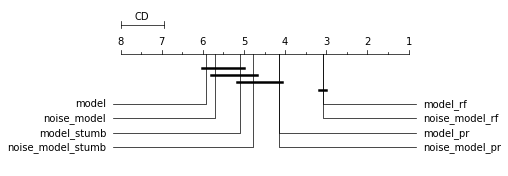

In [79]:
results = autorank(df)
print(results)
create_report(results)
plot_stats(results)